# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
%%bash

wget https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580d53ce_traffic-sign-data/traffic-sign-data.zip

--2016-11-12 16:35:24--  https://d17h27t6h515a5.cloudfront.net/topher/2016/October/580d53ce_traffic-sign-data/traffic-sign-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 54.230.141.64, 54.230.141.136, 54.230.141.85, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|54.230.141.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123550596 (118M)
Saving to: ‘traffic-sign-data.zip’

     0K .......... .......... .......... .......... ..........  0%  214K 9m25s
    50K .......... .......... .......... .......... ..........  0%  330K 7m45s
   100K .......... .......... .......... .......... ..........  0%  654K 6m11s
   150K .......... .......... .......... .......... ..........  0%  637K 5m25s
   200K .......... .......... .......... .......... ..........  0%  651K 4m57s
   250K .......... .......... .......... .......... ..........  0%  662K 4m38s
   300K .......... .......... .......... .......... 

In [2]:
%%bash

mkdir -p data
mv -f traffic-sign-data.zip data/
cd data/
unzip traffic-sign-data.zip

Archive:  traffic-sign-data.zip
  inflating: lab 2 data/changelog.docx  
  inflating: lab 2 data/test.p       
  inflating: lab 2 data/train.p      


In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
data_path = "data/lab 2 data"
training_file = data_path + "/train.p"
testing_file = data_path + "/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train) # X_train.shape[0] also works in this case

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
import numpy as np

n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

### Class Imbalance?

#### Counts of training examples for each of the 43 types of traffic signs:

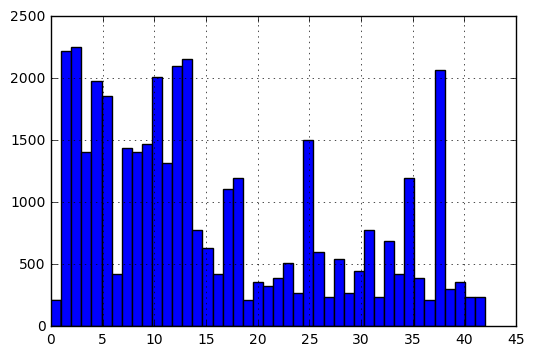

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

label_series = pd.Series(y_train)

%matplotlib inline

label_series.hist(bins=n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import StandardScaler #, label_binarize

X_train_reshaped = np.reshape(X_train.astype('float32'), (len(X_train), -1))
X_test_reshaped = np.reshape(X_test.astype('float32'), (len(X_test), -1))
standard_scaler = StandardScaler().fit(X_train_reshaped)
X_train_reshaped_normalized = standard_scaler.transform(X_train_reshaped)
X_test_reshaped_normalized = standard_scaler.transform(X_test_reshaped)
X_train_normalized = X_train_reshaped_normalized.reshape(-1, image_shape[0], image_shape[1], image_shape[2])
X_test_normalized = X_test_reshaped_normalized.reshape(-1, image_shape[0], image_shape[1], image_shape[2])
#classes = range(n_classes)
#y_train_encoded = label_binarize(y_train, classes).astype(np.float32)
#y_test_encoded = label_binarize(y_test, classes).astype(np.float32)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** Each image is normalized to be zero-centered and have unit variance. As Vincent Vanhoucke stated in the lesson, one reason for normalization is to enable gradient descent to perform better.

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, train_test_split

k = 10
training_validation_data_splitter = StratifiedKFold(n_splits=k)
folds = k * [None]
fold_number = 0
for training_indices, validation_indices in training_validation_data_splitter.split(X_train_normalized, y_train):
    folds[fold_number] = { "training_indices": training_indices, "validation_indices": validation_indices }
    fold_number += 1

X_training, X_validation, y_training, y_validation = train_test_split(X_train_normalized, y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** 
* Using SciKit Learn's `test_train_split()`, the training images are randomly split into validation and training subsets. Having a validation subset is a machine learning best practice that allows us to adjust our model and estimate its ability to generalize to real-world examples without needing to cheat and peak at the test set.
* Although not currently used, in order to preserve the original percentages of samples for each traffic sign, `StratifiedKFold` splits the original `X_train` training data into a training set & validation set 10 different ways (i.e., 10 different folds).

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import tensorflow.contrib.slim as slim

images = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]))
labels = tf.placeholder(tf.int32)
is_training = tf.placeholder(tf.bool)

trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)

def max_pooled_conv(net, scope=None):
    net = slim.conv2d(net, 64, [5, 5], normalizer_fn=slim.batch_norm)
    net = slim.max_pool2d(net, [2, 2], 2)
    return net

def model(images, num_classes, is_training=False, dropout_keep_prob=0.71875, prediction_fn=slim.softmax, scope='CifarNet'):
    # https://github.com/tensorflow/models/blob/master/slim/nets/cifarnet.py
    with tf.variable_scope(scope, 'CifarNet', [images, num_classes], reuse=None):
        net = images
        net = slim.repeat(net, 2, max_pooled_conv, scope="max_pooled_conv")
        net = slim.flatten(net)
        net = slim.fully_connected(net, 384, normalizer_fn=slim.batch_norm, scope='fc3')
        net = slim.dropout(net, dropout_keep_prob, is_training=is_training, scope='dropout3')
        net = slim.fully_connected(net, 192, normalizer_fn=slim.batch_norm, scope='fc4')
        net = slim.fully_connected(net, num_classes,
                                   normalizer_fn=slim.batch_norm,
                                   biases_initializer=tf.zeros_initializer,
                                   weights_initializer=trunc_normal(1/192.0),
                                   weights_regularizer=None,
                                   activation_fn=None,
                                   scope='logits')
    return net

logits = model(images, n_classes, is_training)
predictions = tf.nn.softmax(logits)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 

I based my architecture on the TensorFlow Slim definition of the CIFAR-10 model (https://github.com/tensorflow/models/blob/master/slim/nets/cifarnet.py), which has a couple of convulational + max pool layers followed by a 3-layered fully connected section with dropout between the first 2 fully connected layers. However, I specified batch normalization in the fully connected layers and removed the original normalization layers. Run the cell below to generate the architectural diagram:

In [7]:
# http://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

show_graph(tf.get_default_graph().as_graph_def())

Training...


Validation Epoch 10/10: 100%|██████████| 62/62 [00:06<00:00,  9.14batches/s]


Validation Loss: 0.21397610008716583, Accuracy: 0.9996219873428345
Saving model...
Plotting metrics...


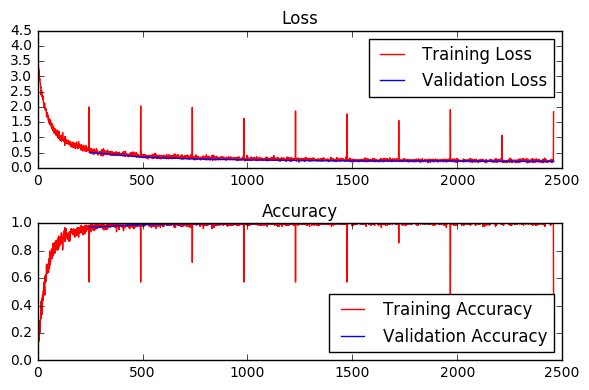

Testing...
Loading saved model...


Epoch  1/1: 100%|██████████| 99/99 [00:11<00:00,  6.67batches/s]

Test Loss: 0.29194000363349915, Accuracy: 0.983941912651062


In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.
import math
from tqdm import tqdm
from sklearn.utils import shuffle

def get_batch(X, y, batch_size, batch_number=0):
    start, end = batch_number*batch_size, (batch_number+1)*batch_size
    length = len(X)
    if end > length:
        end = length
    return X[start:end], y[start:end]

one_hot_encoded_labels = slim.one_hot_encoding(labels, n_classes)

def calculate_loss(logits, one_hot_encoded_labels):
    cross_entropy = slim.losses.softmax_cross_entropy(logits, one_hot_encoded_labels)
    return cross_entropy
loss = calculate_loss(logits, one_hot_encoded_labels)

def optimize(optimizer, loss):
    return optimizer.minimize(loss)
#learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer()
optimize = optimize(optimizer, loss)

def calculate_accuracy(predictions, one_hot_encoded_labels):
    is_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(one_hot_encoded_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
    return accuracy
accuracy = calculate_accuracy(predictions, one_hot_encoded_labels)

tf.logging.set_verbosity(tf.logging.INFO)
print("Training...")
epochs = 10
batch_size = 128
batches = []
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []
saver = tf.train.Saver()
model_path = 'model.ckpt'
init = tf.initialize_all_variables()
with tf.Session() as session:  
    session.run(init)
    for epoch in range(epochs):
        training_batch_count = int(math.ceil(len(X_training) / batch_size))
        epoch_number = epoch + 1
        training_batches_progress_bar = tqdm(range(training_batch_count), 
                                             desc='Training Epoch {:>2}/{}'.format(epoch_number, epochs), 
                                             unit='batches')
        X_training, y_training = shuffle(X_training, y_training)
        for batch_number in training_batches_progress_bar:
            batch_images, batch_labels = get_batch(X_training, y_training, batch_size, batch_number)
            batch_loss, _, batch_accuracy = session.run([loss, optimize, accuracy], feed_dict={images: batch_images, 
                                                                                               labels: batch_labels, 
                                                                                               is_training: True})
            training_loss.append(batch_loss)
            training_accuracy.append(batch_accuracy)
        
        validation_batch_count = int(math.ceil(len(X_validation) / batch_size))
        validation_batches_progress_bar = tqdm(range(validation_batch_count), 
                                               desc='Validation Epoch {:>2}/{}'.format(epoch_number, epochs), 
                                               unit='batches')
        batch_validation_losses = []
        batch_validation_accuracies = []
        for batch_number in validation_batches_progress_bar:
            batch_images, batch_labels = get_batch(X_validation, y_validation, batch_size, batch_number)
            batch_validation_loss, _, batch_validation_accuracy = session.run([loss, optimize, accuracy], 
                                                                              feed_dict={images: batch_images,
                                                                                         labels: batch_labels,
                                                                                         is_training: False})
            batch_validation_losses.append(batch_validation_loss)
            batch_validation_accuracies.append(batch_validation_accuracy)
        epoch_validation_loss = np.mean(batch_validation_losses)
        epoch_validation_accuracy = np.mean(batch_validation_accuracies)
        validation_loss.append(epoch_validation_loss)
        validation_accuracy.append(epoch_validation_accuracy)
        batches.append(epoch_number * training_batch_count) # ensure that epoch validation measurements are on same x-scale as training
    print("Validation Loss: {}, Accuracy: {}".format(validation_loss[-1], validation_accuracy[-1]))
    print("Saving model...")
    saver.save(session, model_path)
print("Plotting metrics...")
%matplotlib inline
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(training_loss, 'r', label='Training Loss')
loss_plot.plot(batches, validation_loss, 'b', label='Validation Loss')
loss_plot.legend(loc=1)
accuracy_plot = plt.subplot(212)
accuracy_plot.set_title('Accuracy')
accuracy_plot.plot(training_accuracy, 'r', label='Training Accuracy')
accuracy_plot.plot(batches, validation_accuracy, 'b', label='Validation Accuracy')
accuracy_plot.set_ylim([0, 1.0])
accuracy_plot.legend(loc=4)
plt.tight_layout()
plt.show()
print("Testing...")
test_loss = []
test_accuracy = []
with tf.Session() as session:  
    session.run(init)
    print("Loading saved model...")
    saver.restore(session, model_path)
    batch_count = int(math.ceil(len(X_test) / batch_size))
    batches_progress_bar = tqdm(range(batch_count),
                                desc='Epoch {:>2}/{}'.format(1, 1),
                                unit='batches')
    for batch_number in batches_progress_bar:
        batch_images, batch_labels = get_batch(X_test_normalized, y_test, batch_size, batch_number)
        batch_loss, _, batch_accuracy = session.run([loss, optimize, accuracy], feed_dict={images: batch_images, 
                                                                                           labels: batch_labels, 
                                                                                           is_training: False})
        test_loss.append(batch_loss)
        test_accuracy.append(batch_accuracy)
    print("Test Loss: {}, Accuracy: {}".format(np.mean(test_loss), np.mean(test_accuracy)))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

Found the below optimal values based on incrementally trying different values and seeing their effects on validation & test losses and accuracies:

* Optimizer: Adam (default learning rate and other parameters)
* Batch Size: 128
* Epochs: 10
* Dropout: 0.71875

Things to try later:
* Data Augmentation
* Ensembling different instances of the same model each independently trained on one of the stratified k-fold training/validation splits
* Pseudo-Labeling
* More modern architecture like Inception and/or ResNet

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** 

Using the TensorFlow lab notebook as a template to start from, as well as using TensorFlow's Slim API to more quickly define an architecture, I iteratively refined the model by looking at the effects on validation and test losses & accuracies when trying the following:
* Started with a simple 1-layer (fully-connected) model.
* Tried Cifar-10 model -- without pre-trained weights -- defined in  https://github.com/tensorflow/models/blob/master/slim/nets/cifarnet.py since it also accepts 32x32 images
* Changed to batch norm layers
* Tried different epochs, dropout & learning rates to see which would result in the optimal validation and test losses & accuracies.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

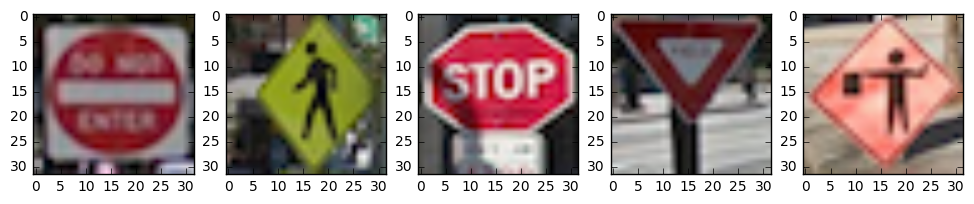

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread
f = plt.figure(figsize=(12,5))
filenames = ['do_not_enter','pedestrian_crossing', 'stop', 'yield', 'road_work']
filenames_count = len(filenames)
rows = 1
new_test_images = []
for i, filename in enumerate(filenames):
    sp = f.add_subplot(1, filenames_count//rows, i+1)
    img = imread(filename + '.png', mode='RGB')
    #print(type(img), img.shape)
    new_test_images.append(img)
    plt.imshow(img)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** 

Some of the U.S. signs might not exactly match any of the German signs that the model was trained on. The inclusion of other objects in the images may confuse the model. The lighting, weather, and environmental conditions of the photos I take may also not be similar enough to the training images.

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import pandas as pd

# normalize new test images
new_test_images_numpy = np.array(new_test_images)
new_test_images_reshaped = np.reshape(new_test_images_numpy.astype('float32'), (len(new_test_images_numpy), -1))

new_test_images_reshaped_normalized = standard_scaler.transform(new_test_images_reshaped)
new_test_images_normalized = new_test_images_reshaped_normalized.reshape(-1, image_shape[0], image_shape[1], image_shape[2])

signnames_dataframe = pd.read_csv('signnames.csv')
with tf.Session() as session:  
    session.run(init)
    print("Loading saved model...")
    saver.restore(session, model_path)
    print("Predicting...")
    new_predictions = session.run(predictions, feed_dict={images: new_test_images_normalized,
                                                            #labels: None,
                                                            is_training: False})

Loading saved model...
Predicting...


Image: do_not_enter, Prediction: Speed limit (30km/h) (sign ID 1), 
Image: pedestrian_crossing, Prediction: Priority road (sign ID 12), 
Image: stop, Prediction: Speed limit (60km/h) (sign ID 3), 
Image: yield, Prediction: Keep right (sign ID 38), 
Image: road_work, Prediction: Speed limit (50km/h) (sign ID 2), 


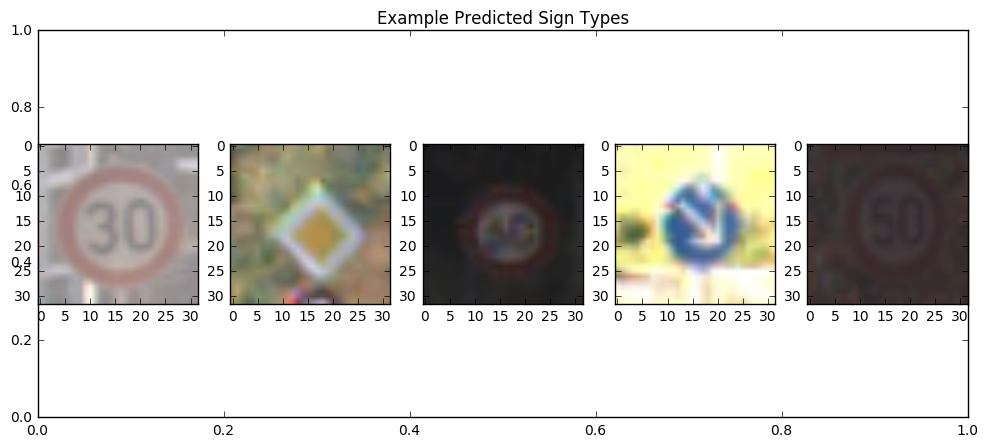

In [11]:
predicted_sign_ids = np.argmax(new_predictions, axis=1)
for i, filename in enumerate(filenames):
    sign_id = predicted_sign_ids[i]
    print("Image: {}, Prediction: {} (sign ID {}), ".format(filename, signnames_dataframe.SignName[sign_id], sign_id))
f = plt.figure(figsize=(12,5))
plt.title("Example Predicted Sign Types")
prediction_count = 5
rows = 1
for i, predicted_sign_id in enumerate(predicted_sign_ids):
    training_image_index = next(i for i, label in enumerate(y_train) if label == predicted_sign_id)
    sp = f.add_subplot(1, prediction_count//rows, i+1)
    plt.imshow(X_train[training_image_index])

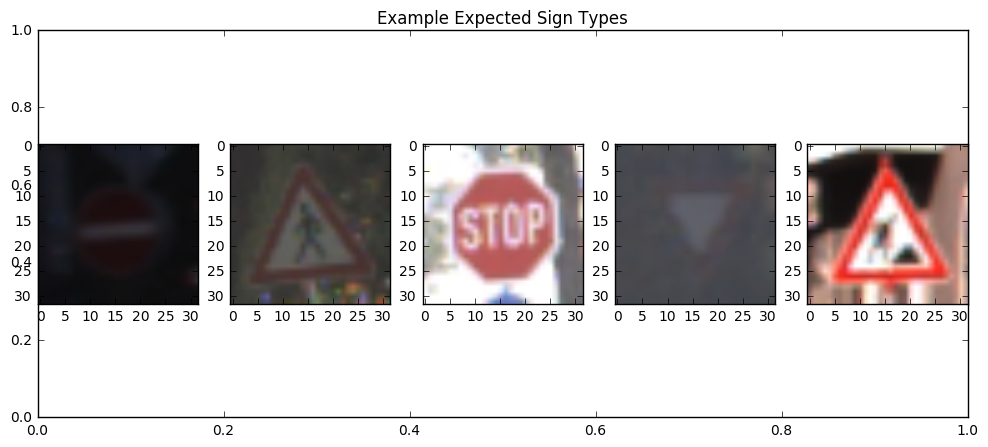

In [12]:
f = plt.figure(figsize=(12,5))
plt.title("Example Expected Sign Types")
for i, expected_sign_id in enumerate([17, 27, 14, 13, 25]):
    training_image_index = next(i for i, label in enumerate(y_train) if label == expected_sign_id)
    sp = f.add_subplot(1, prediction_count//rows, i+1)
    plt.imshow(X_train[training_image_index])

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The top-1 accuracy doesn't look good for the 5 new test images. None of the new images matched their German counterparts. The only one that was close was the pedestrian sign, which was similar in color (yellow). The previously calculated loss & accuracy on the test dataset indicates that the model was trained well, and performed well under testing, for German signs, but does not generalize well to non-German signs. Perhaps a bigger variety of training images, and a bigger neural network architecture, would help classify the new test images more accurately.

Loading saved model...
Predicting...


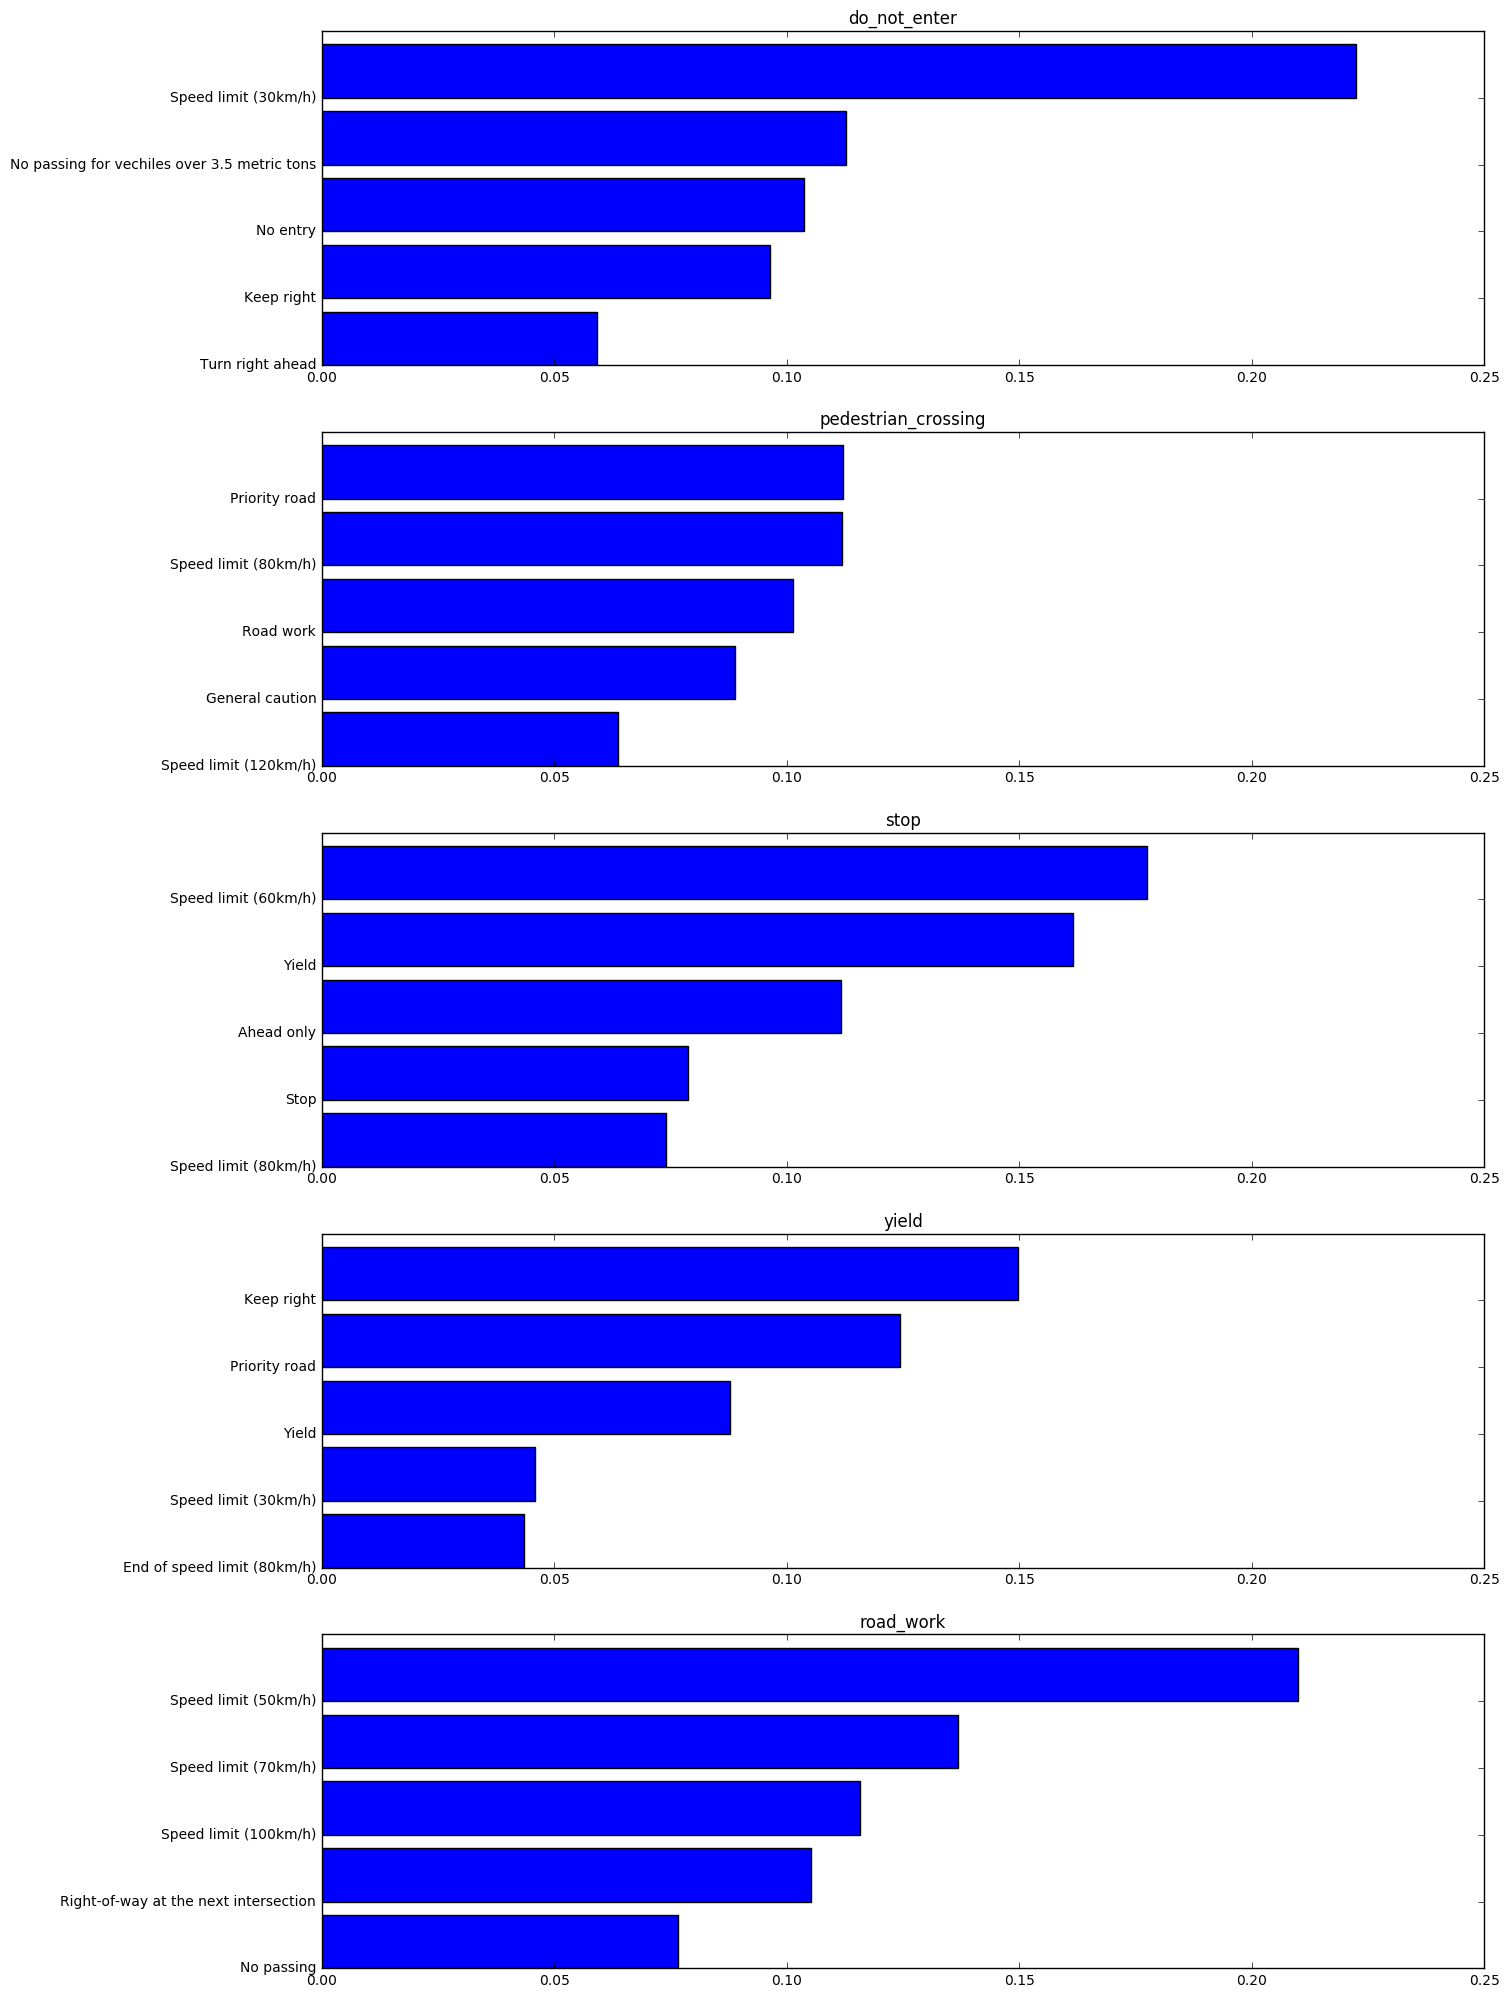

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_predictions = tf.nn.top_k(predictions, k=5)

with tf.Session() as session:  
    session.run(init)
    print("Loading saved model...")
    saver.restore(session, model_path)
    print("Predicting...")
    top_new_predictions = session.run(top_predictions, feed_dict={images: new_test_images_normalized,
                                                            #labels: None,
                                                            is_training: False})
top_prediction_values, top_prediction_indices = top_new_predictions
f = plt.figure(figsize=(15,25))
#plt.title("Top 5 Predictions")
y_positions = np.arange(5)
sp = None
for i in range(prediction_count):
    sp = f.add_subplot(5, 1, i+1, sharex=sp)
    top_signnames = [signnames_dataframe.SignName[sign_id] for sign_id in top_prediction_indices[i]]
    top_values = top_prediction_values[i]
    plt.barh(y_positions, top_values[::-1]) # reverse the order so that highest is on top
    plt.yticks(y_positions, top_signnames[::-1])
    plt.title(filenames[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

* Because none of the prediction values are close to 100%, the model seems mostly uncertain of the classifications of the new test images that we've just given it.
* For incorrect initial predictions, the correct predictions appear in the top 5 (except for road work & pedestrian signs)

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

(Not applicable)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.